In [6]:
import pandas as pd

# Try reading as a normal CSV file
file_path = "AAVEUSDT.csv.gzip"  # Update the path if needed
df = pd.read_csv(file_path)  # Removed compression="gzip"

# Display first few rows to verify
print(df.head())


   Unnamed: 0            timestamp    open    high     low   close  volume  \
0           0  2021-01-01 00:00:00  88.581  88.734  88.475  88.600   183.5   
1           1  2021-01-01 00:01:00  88.686  88.708  88.559  88.647    81.8   
2           2  2021-01-01 00:02:00  88.568  88.660  88.421  88.421   148.5   
3           3  2021-01-01 00:03:00  88.513  88.513  88.256  88.335   166.0   
4           4  2021-01-01 00:04:00  88.367  88.498  88.299  88.470   259.0   

      close_time    quote_av  trades  tb_base_av  tb_quote_av  ignore  
0  1609459259999  16268.2382      62       142.9   12672.0879       0  
1  1609459319999   7252.6521      39        43.3    3840.4015       0  
2  1609459379999  13150.7434      41        32.3    2862.9951       0  
3  1609459439999  14665.5388      49        20.7    1828.1408       0  
4  1609459499999  22888.3414      38       230.1   20335.7561       0  


In [7]:
import pandas as pd

# ======= Step 1: Load the Dataset =======
file_path = "AAVEUSDT.csv.gzip"  # Update if needed
df = pd.read_csv(file_path)

# ======= Step 2: Remove Unnecessary Columns =======
df = df.drop(columns=["Unnamed: 0", "close_time", "ignore"], errors="ignore")

# ======= Step 3: Convert Timestamp to Datetime Format =======
df["timestamp"] = pd.to_datetime(df["timestamp"])

# ======= Step 4: Resample Data to Hourly Intervals =======
df_resampled = df.resample('1H', on='timestamp').mean().dropna()

# ======= Step 5: Save Processed Dataset =======
df_resampled.to_csv("processed_AAVEUSDT_hourly.csv", index=False)
print("Processed dataset saved as 'processed_AAVEUSDT_hourly.csv'.")

# ======= Step 6: Display First Few Rows =======
print(df_resampled.head())


C:\Users\shiva\AppData\Local\Temp\ipykernel_3096\1866501261.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('1H', on='timestamp').mean().dropna()


Processed dataset saved as 'processed_AAVEUSDT_hourly.csv'.
                          open       high        low      close      volume  \
timestamp                                                                     
2021-01-01 00:00:00  87.078183  87.193517  86.973133  87.065483  482.811667   
2021-01-01 01:00:00  87.821200  87.932133  87.710800  87.803767  391.631667   
2021-01-01 02:00:00  87.154383  87.249100  87.069367  87.157650  227.720000   
2021-01-01 03:00:00  88.421717  88.526850  88.346933  88.426200  229.650000   
2021-01-01 04:00:00  88.172167  88.270083  88.071517  88.162767  270.246667   

                         quote_av     trades  tb_base_av   tb_quote_av  
timestamp                                                               
2021-01-01 00:00:00  42044.680132  98.200000  228.996667  19958.955470  
2021-01-01 01:00:00  34421.372993  85.316667  170.961667  15040.955652  
2021-01-01 02:00:00  19844.127042  62.583333  105.726667   9219.294343  
2021-01-01 03:00:00  

In [13]:
import pandas as pd

# Load the processed dataset
file_path = "processed_AAVEUSDT_hourly.csv"
df = pd.read_csv(file_path)

# Reset index to bring back the "timestamp" column
df.reset_index(inplace=True)

# Convert timestamp back to datetime format
df["timestamp"] = pd.to_datetime(df["index"])
df.drop(columns=["index"], inplace=True)  # Drop the temporary index column

# Save the updated dataset
updated_file_path = "fixed_AAVEUSDT_hourly.csv"
df.to_csv(updated_file_path, index=False)  # Save without index

# Confirm saved file
print(f"Updated dataset saved as '{updated_file_path}'")

# Check the first few rows
print(df.head())


Updated dataset saved as 'fixed_AAVEUSDT_hourly.csv'
        open       high        low      close      volume      quote_av  \
0  87.078183  87.193517  86.973133  87.065483  482.811667  42044.680132   
1  87.821200  87.932133  87.710800  87.803767  391.631667  34421.372993   
2  87.154383  87.249100  87.069367  87.157650  227.720000  19844.127042   
3  88.421717  88.526850  88.346933  88.426200  229.650000  20324.513678   
4  88.172167  88.270083  88.071517  88.162767  270.246667  23880.126850   

      trades  tb_base_av   tb_quote_av                     timestamp  
0  98.200000  228.996667  19958.955470 1970-01-01 00:00:00.000000000  
1  85.316667  170.961667  15040.955652 1970-01-01 00:00:00.000000001  
2  62.583333  105.726667   9219.294343 1970-01-01 00:00:00.000000002  
3  64.050000  101.183333   8954.714327 1970-01-01 00:00:00.000000003  
4  69.233333  103.030000   9117.159793 1970-01-01 00:00:00.000000004  


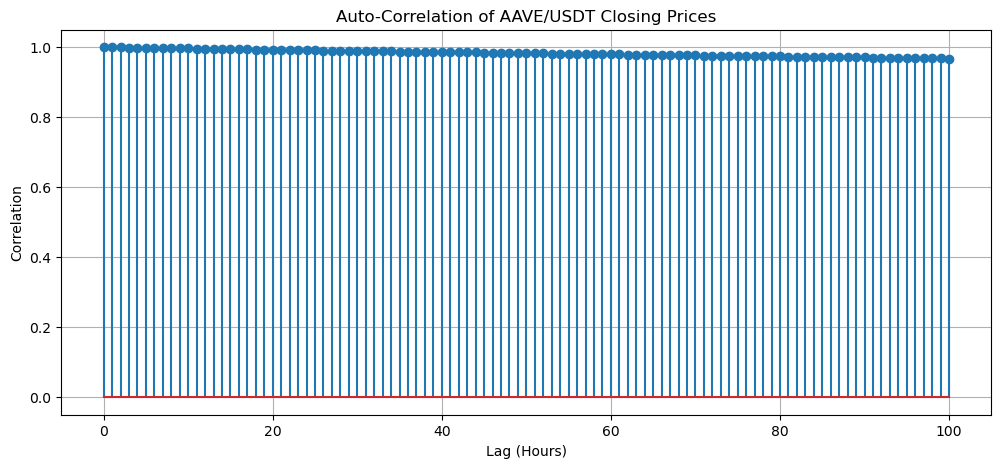

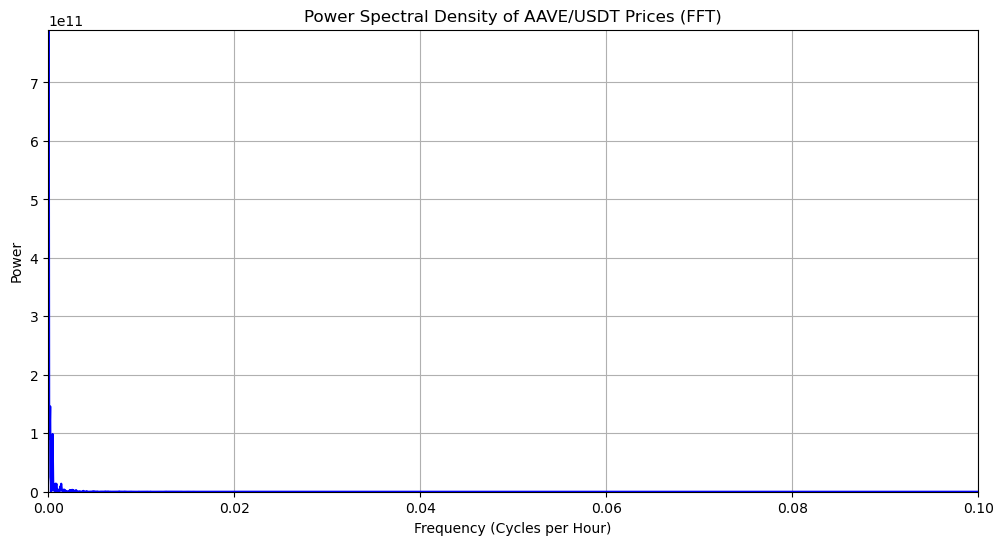

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from statsmodels.tsa.stattools import acf

# ======= Step 1: Load the Processed Dataset =======
file_path = "fixed_AAVEUSDT_hourly.csv"  # Ensure correct path
df = pd.read_csv(file_path)

# Convert timestamp back to datetime (if needed)
df["timestamp"] = pd.to_datetime(df["timestamp"])

# ======= Step 2: Compute Auto-Correlation Function (ACF) =======
prices = df["close"].values
acf_values = acf(prices, nlags=100, fft=True)  # Compute ACF with 100 lags

# ======= Step 3: Plot Auto-Correlation Function =======
plt.figure(figsize=(12, 5))
plt.stem(range(len(acf_values)), acf_values)  # Removed `use_line_collection`
plt.title("Auto-Correlation of AAVE/USDT Closing Prices")
plt.xlabel("Lag (Hours)")
plt.ylabel("Correlation")
plt.grid()
plt.show()

# ======= Step 4: Preprocess Prices for FFT (Remove DC Component) =======
prices = prices - np.mean(prices)  # Subtract mean to remove DC component

# ======= Step 5: Apply FFT =======
fft_result = fft(prices)  # Compute FFT
frequencies = fftfreq(len(prices), d=1)  # Frequency bins (1-hour intervals)

# Compute Power Spectral Density (PSD)
psd = np.abs(fft_result) ** 2  # Square of magnitudes to get power

# Take only the positive half of frequencies
positive_frequencies = frequencies[:len(frequencies)//2]
positive_psd = psd[:len(psd)//2]

# ======= Step 6: Plot Power Spectral Density (PSD) =======
plt.figure(figsize=(12, 6))
plt.plot(positive_frequencies, positive_psd, color='blue')
plt.title("Power Spectral Density of AAVE/USDT Prices (FFT)")
plt.xlabel("Frequency (Cycles per Hour)")
plt.ylabel("Power")
plt.xlim([0, 0.1])  # Focus on meaningful frequency range
plt.ylim([0, np.max(positive_psd) * 0.2])  # Adjust scale for clarity
plt.grid()
plt.show()


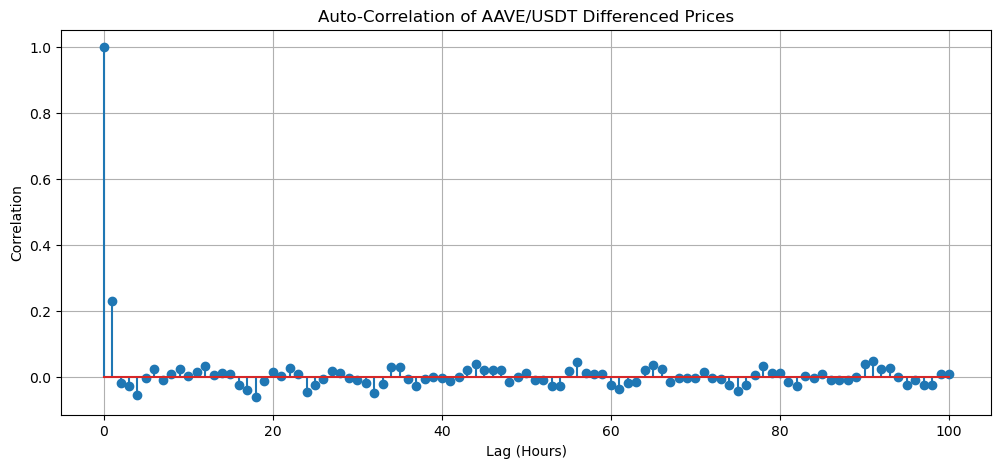

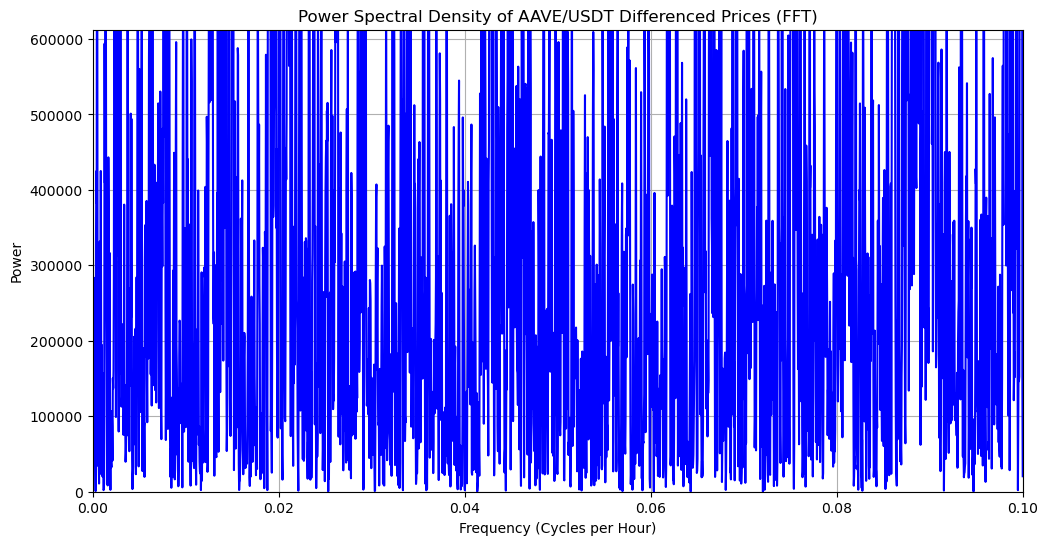

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from statsmodels.tsa.stattools import acf

# ======= Step 1: Load the Processed Dataset =======
file_path = "fixed_AAVEUSDT_hourly.csv"  # Ensure correct path
df = pd.read_csv(file_path)

# Convert timestamp back to datetime (if needed)
df["timestamp"] = pd.to_datetime(df["timestamp"])

# ======= Step 2: Apply First-Order Differencing to Remove Trend =======
df["diff_close"] = df["close"].diff().dropna()

# Drop NaN values from differencing
df = df.dropna()

# Extract differenced closing prices
prices = df["diff_close"].values

# ======= Step 3: Compute Auto-Correlation Function (ACF) =======
acf_values = acf(prices, nlags=100, fft=True)  # Compute ACF with 100 lags

# ======= Step 4: Plot Auto-Correlation Function =======
plt.figure(figsize=(12, 5))
plt.stem(range(len(acf_values)), acf_values)
plt.title("Auto-Correlation of AAVE/USDT Differenced Prices")
plt.xlabel("Lag (Hours)")
plt.ylabel("Correlation")
plt.grid()
plt.show()

# ======= Step 5: Apply FFT =======
prices = prices - np.mean(prices)  # Remove mean (DC Component)
fft_result = fft(prices)  # Compute FFT
frequencies = fftfreq(len(prices), d=1)  # Frequency bins (1-hour intervals)

# Compute Power Spectral Density (PSD)
psd = np.abs(fft_result) ** 2  # Square of magnitudes to get power

# Take only the positive half of frequencies
positive_frequencies = frequencies[:len(frequencies)//2]
positive_psd = psd[:len(psd)//2]

# ======= Step 6: Plot Power Spectral Density (PSD) =======
plt.figure(figsize=(12, 6))
plt.plot(positive_frequencies, positive_psd, color='blue')
plt.title("Power Spectral Density of AAVE/USDT Differenced Prices (FFT)")
plt.xlabel("Frequency (Cycles per Hour)")
plt.ylabel("Power")
plt.xlim([0, 0.1])  # Focus on meaningful frequency range
plt.ylim([0, np.max(positive_psd) * 0.2])  # Adjust scale for clarity
plt.grid()
plt.show()


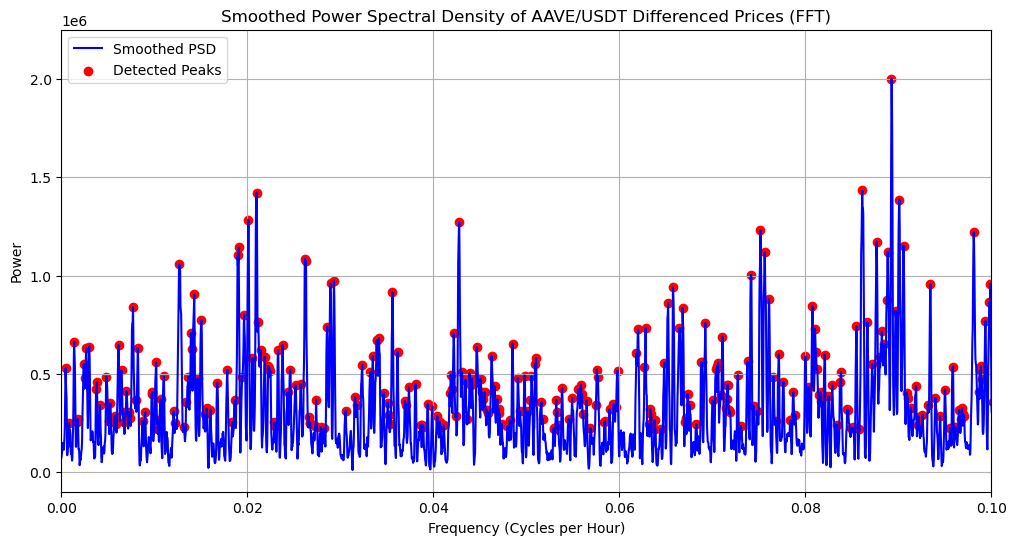

Identified Trading Cycles (in Hours): [2.25200000e+03 1.17495652e+03 7.30378378e+02 ... 2.02124159e+00
 2.01686693e+00 2.00474777e+00]


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import find_peaks

# ======= Step 1: Load the Processed Dataset =======
file_path = "fixed_AAVEUSDT_hourly.csv"  # Ensure correct path
df = pd.read_csv(file_path)

# Convert timestamp back to datetime (if needed)
df["timestamp"] = pd.to_datetime(df["timestamp"])

# ======= Step 2: Apply First-Order Differencing =======
df["diff_close"] = df["close"].diff().dropna()
df = df.dropna()

# Extract differenced closing prices
prices = df["diff_close"].values

# ======= Step 3: Apply FFT =======
prices = prices - np.mean(prices)  # Remove mean (DC Component)
fft_result = fft(prices)  # Compute FFT
frequencies = fftfreq(len(prices), d=1)  # Frequency bins (1-hour intervals)

# Compute Power Spectral Density (PSD)
psd = np.abs(fft_result) ** 2  # Square of magnitudes to get power

# Take only the positive half of frequencies
positive_frequencies = frequencies[:len(frequencies)//2]
positive_psd = psd[:len(psd)//2]

# ======= Step 4: Smooth the PSD (Moving Average) =======
window_size = 5  # Adjust this for more or less smoothing
smoothed_psd = np.convolve(positive_psd, np.ones(window_size)/window_size, mode='same')

# ======= Step 5: Find Peaks in the FFT Spectrum =======
peaks, _ = find_peaks(smoothed_psd, height=np.max(smoothed_psd) * 0.1)  # Detect strong peaks

# Convert Frequency to Time Period
dominant_frequencies = positive_frequencies[peaks]
dominant_periods = 1 / dominant_frequencies  # Convert cycles per hour to hours

# ======= Step 6: Plot Smoothed Power Spectral Density (PSD) =======
plt.figure(figsize=(12, 6))
plt.plot(positive_frequencies, smoothed_psd, color='blue', label="Smoothed PSD")
plt.scatter(dominant_frequencies, smoothed_psd[peaks], color='red', label="Detected Peaks")
plt.title("Smoothed Power Spectral Density of AAVE/USDT Differenced Prices (FFT)")
plt.xlabel("Frequency (Cycles per Hour)")
plt.ylabel("Power")
plt.xlim([0, 0.1])  # Focus on meaningful frequency range
plt.legend()
plt.grid()
plt.show()

# ======= Step 7: Print Identified Cycles =======
print("Identified Trading Cycles (in Hours):", dominant_periods)
